In [ ]:
from ipywidgets import Widget

Widget.close_all()

## Template Matching

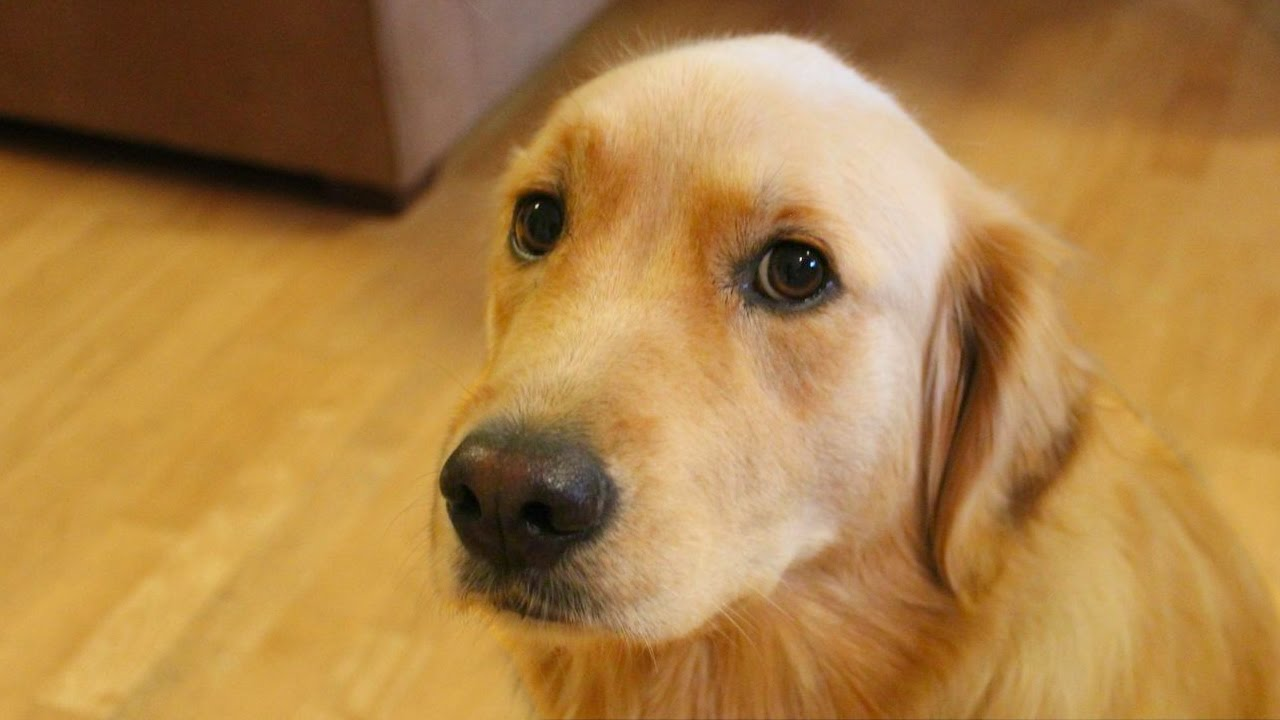

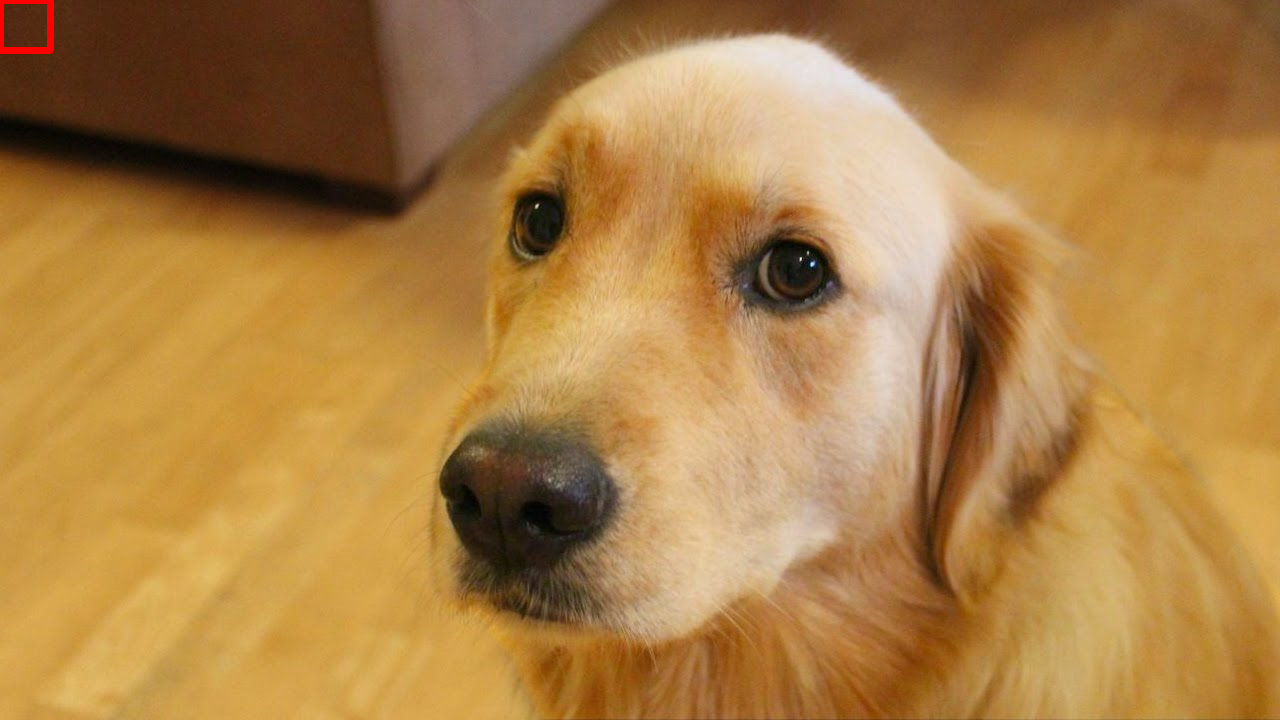

In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow # Import cv2_imshow

# Load input image and convert to grayscale
image = cv2.imread('/content/bobby.jpg')
cv2_imshow(image) # Use cv2_imshow instead of cv2.imshow
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Load Bigger image - **Corrected path and error handling**
try:
    bigger_image = cv2.imread('/content/bobby.jpg', 0) # **Changed path to /content/searchImage.jpg**
    if bigger_image is None:
        raise ValueError("Template image not found or could not be loaded.")
except Exception as e:
    print(f"Error loading template image: {e}")
    # Handle the error, e.g., exit or use a default template
    exit()

# Assuming template is defined or replace with actual template image
template = bigger_image # Replace if template is a different variable

# Ensure template is smaller than the search image
if template.shape[0] > gray.shape[0] or template.shape[1] > gray.shape[1]:
    print("Error: Template image is larger than the search image.")
    # Resize template or handle the error appropriately
    exit()

result = cv2.matchTemplate(gray, template, cv2.TM_CCOEFF)
min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(result)

#Create Bounding Box
top_left = max_loc
bottom_right = (top_left[0] + 50, top_left[1] + 50)
cv2.rectangle(image, top_left, bottom_right, (0,0,255), 5)

cv2_imshow(image) # Use cv2_imshow instead of cv2.imshow

## Harris Corner Algorithm

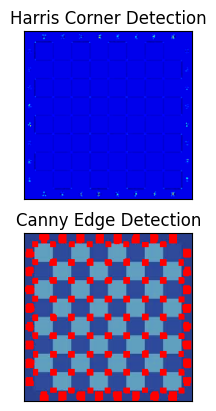

In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('/content/images (1).jpeg',0)
img = np.float32(img)
corners = cv2.cornerHarris(img,2,3,0.04)

corners = cv2.cornerHarris(img,2,3,0.04)

plt.subplot(2,1,1), plt.imshow(corners ,cmap = 'jet')
plt.title('Harris Corner Detection'), plt.xticks([]), plt.yticks([])

img2 = cv2.imread('/content/images (1).jpeg')
corners2 = cv2.dilate(corners, None, iterations=3)
img2[corners2>0.01*corners2.max()] = [255,0,0]

plt.subplot(2,1,2),plt.imshow(img2,cmap = 'gray')
plt.title('Canny Edge Detection'), plt.xticks([]), plt.yticks([])

plt.show()

이전 코드에서 7번 줄은 해리스 코너 알고리즘이 호출되는 지점입니다.  
모서리가 식별되면 딜레이트() 함수를 사용하여 강조 표시하고 식별된 픽셀에 새 창에 표시할 빨간색을 할당합니다.

## Scale Variant Feature Transform, SIFT

OpenCV에는 SIFT에 내장된 기능이 있지만 특허를 받았기 때문에 명시적으로 설치해야 합니다. 다음 단계와 코드는 SIFT 기능을 구현하는 방법을 보여줍니다:  
이미지를 로드하고 그레이스케일로 변환합니다. SIFT() 함수를 사용하여 SIFT 객체를 구성합니다.  
Sift.detect() 함수는 이미지에서 키포인트를 찾습니다. 이미지의 일부만 검색하려면 마스크를 통과시킬 수 있습니다.  
각 키포인트는 (x,y) 좌표, 의미 있는 이웃의 크기, 방향을 지정하는 각도, 키포인트의 강도를 지정하는 응답 등 많은 속성을 가진 특수 구조입니다.  
OpenCV는 또한 키포인트의 위치에 작은 원을 그리는 cv2.DrawKeyPoints() 기능도 제공합니다.

 CV2.DRAW_MATS_FLAGS_DRAW_RICH_KEYPOINTS 플래그를 통과하면 키포인트 크기의 원을 그리며 방향까지 표시합니다.

Number of keypoints Detected:  207


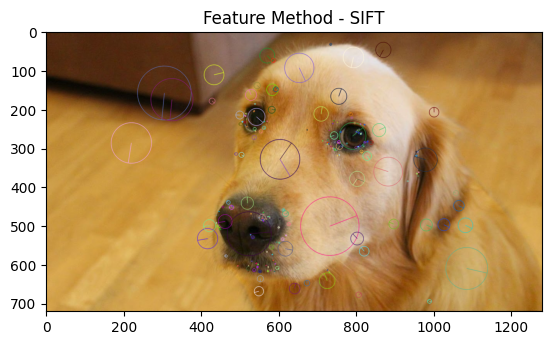

In [ ]:
import cv2
import numpy as np

image = cv2.imread('/content/bobby.jpg')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Create SIFT Feature Detector object using cv2.SIFT_create()
sift = cv2.SIFT_create()

# Detect key points
keypoints = sift.detect(gray, None)
print("Number of keypoints Detected: ", len(keypoints))

# Draw rich key points on input image
image = cv2.drawKeypoints(image, keypoints, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS, outImage=image)

# Display the image using cv2.imshow() or another appropriate function
# cv2.imshow('Feature Method - SIFT', image) # cv2.imshow might not work in all environments
# cv2.waitKey(0)
# cv2.destroyAllWindows()

# Consider using matplotlib.pyplot.imshow if cv2.imshow doesn't work
import matplotlib.pyplot as plt
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))  # Convert BGR to RGB for matplotlib
plt.title('Feature Method - SIFT')
plt.show()

## Features from Accelerated Segment Test, FAST
가속 세그먼트 테스트의 특징(FATS)은 2006년 에드워드 로스텐과 톰 드러먼드에 의해 처음 도입되었습니다. 이전의 특징 검출기는 실시간 이미지를 수집하는 비디오 카메라나 로봇과 같은 실시간 애플리케이션에는 유용하지 않습니다.  
이러한 사용 사례는 런타임에 특징 검출에 지연이 발생하면 실패합니다.  
FAST 알고리즘은 이미지의 키 포인트를 계산하기 위해 픽셀 이웃을 사용합니다.

이웃의 경우 세 가지 플래그가 정의됩니다: cv2.FAST_FEATURE_DETCTOR_TYPE_5_8, cv2.FAST_FEATURE_DETCTOR_TYPE_7_12, 그리고 cv2.FAST_FEATURE_DETCTOR_TYPE_9_16. 다음은 FAST 특징점을 감지하고 그리기 위한 간단한 코드입니다:

Number of keypoints Detected:  1386


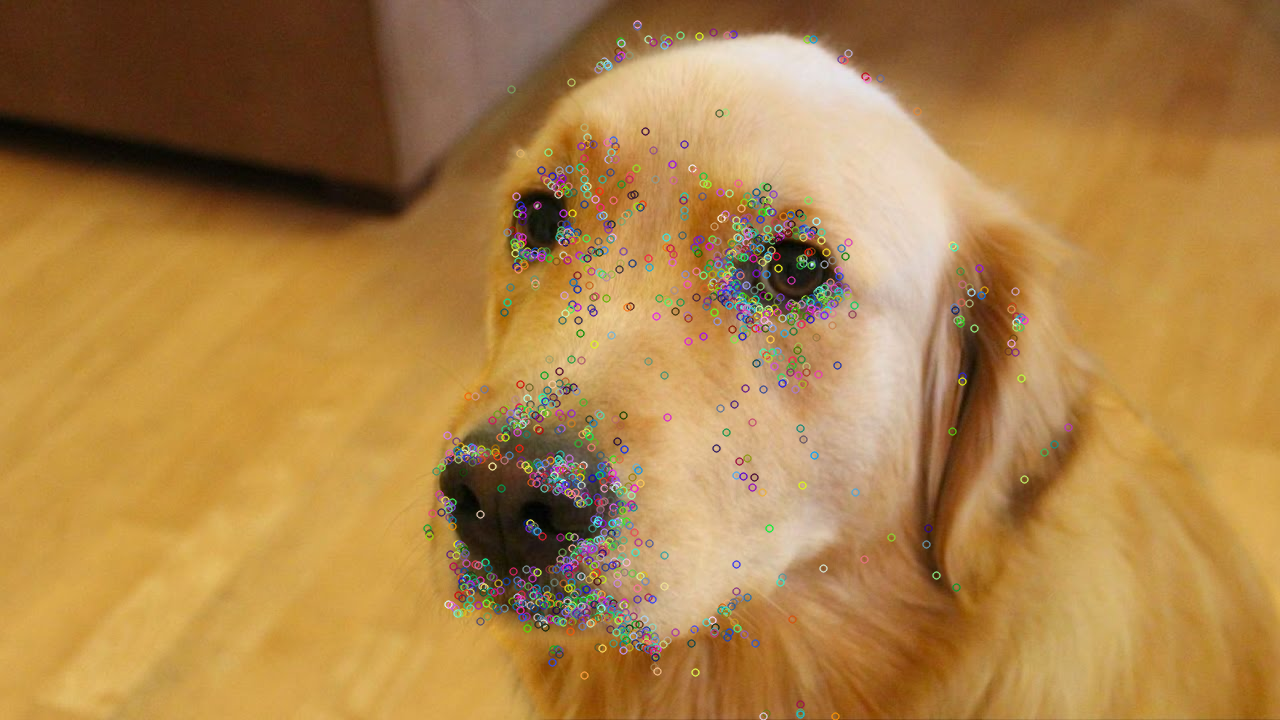

In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow # Import cv2_imshow

image = cv2.imread('/content/bobby.jpg')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Create FAST Detector object
fast = cv2.FastFeatureDetector_create()  # Use cv2.FastFeatureDetector_create() instead of cv2.FastFeatureDetector()

# Obtain Key points, by default non max suppression is On
# to turn off set fast.setBool('nonmaxSuppression', False)
keypoints = fast.detect(gray, None)
print("Number of keypoints Detected: ", len(keypoints))

# Draw rich keypoints on input image
image = cv2.drawKeypoints(image, keypoints, None, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

# Display the image using cv2_imshow
cv2_imshow(image)  # Use cv2_imshow instead of cv2.imshow

# No need for cv2.waitKey() and cv2.destroyAllWindows() in Colab

## Binary Robust Independent Elementary Features
이진 강건 독립 초등 특징(BRIEF)은 비교적 빠른 메서드 특징 설명자 계산기 및 매칭 알고리즘입니다. 또한 평면 회전이 있는 경우를 제외하고는 더 높은 인식률을 제공합니다.

Number of keypoints Detected:  11


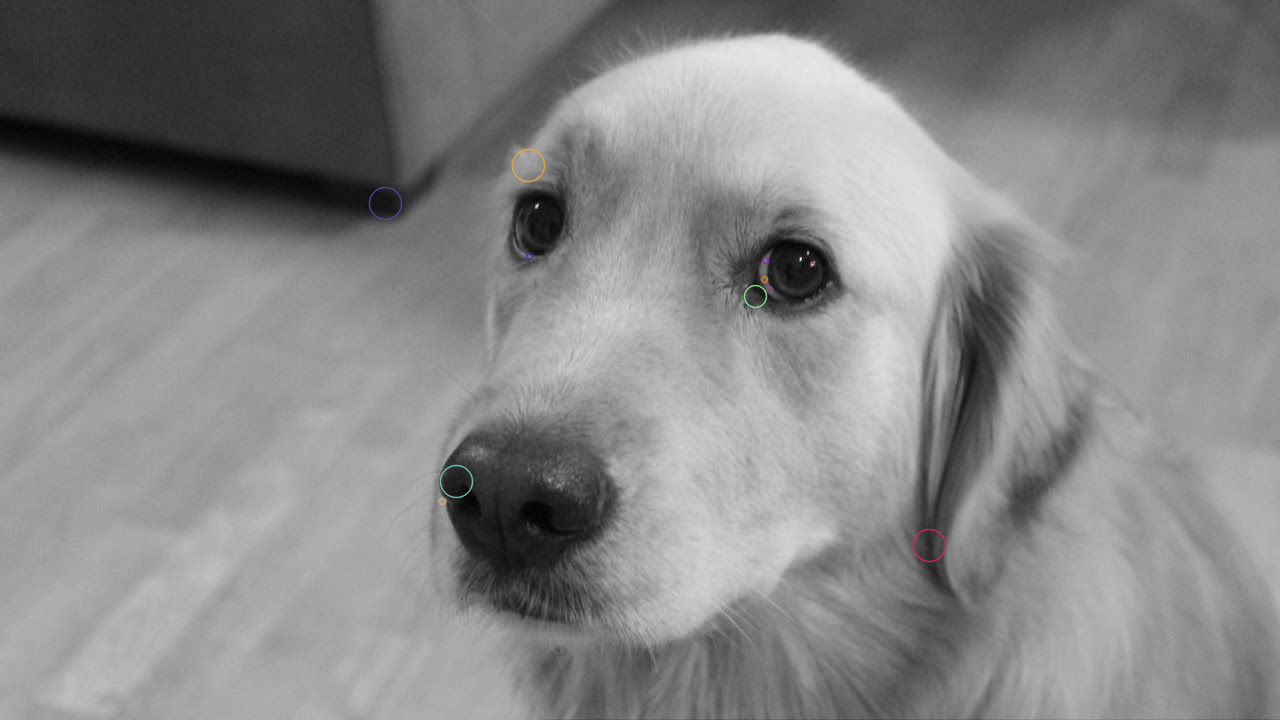

In [11]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

# 이미지 로드 및 그레이스케일로 변환
img = cv2.imread('/content/bobby.jpg', cv2.IMREAD_GRAYSCALE)

# STAR 특징 감지기 초기화
star = cv2.xfeatures2d.StarDetector_create()

# BRIEF 설명자 초기화
brief = cv2.xfeatures2d.BriefDescriptorExtractor_create()

# 키포인트 감지
kp = star.detect(img, None)

# 키포인트에서 설명자 계산
kp, des = brief.compute(img, kp)
print ("Number of keypoints Detected: ", len(kp))

# 특징점을 이미지에 그려서 시각화
image = cv2.drawKeypoints(img, kp, None, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

# cv2.imshow()를 사용하여 이미지 표시
cv2_imshow(image)
cv2.waitKey()  # 키 입력 대기
cv2.destroyAllWindows()  # 모든 창 닫기

### Oriented FAST and Rotated BRIEF
ORB는 FAST 키포인트 검출기와 BRIEF 디스크립터를 결합한 것으로, 추가 성능 수정 사항이 포함되어 있습니다.  
이 방법은 FAST 기법을 적용하여 키포인트를 식별한 후 해리스 코너 방법을 사용하여 상위 n개의 포인트를 측정합니다.

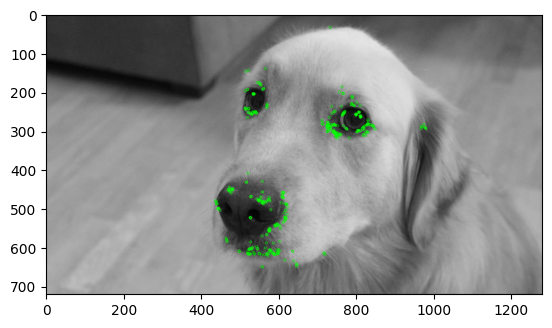

(<matplotlib.image.AxesImage at 0x7ff8c60a8890>, None)

In [2]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

# Load image in grayscale and reduce size if necessary
img = cv2.imread('/content/bobby.jpg', 0)
# Resize if the image is too large
# img = cv2.resize(img, (0, 0), fx=0.5, fy=0.5)

# Initiate ORB detector
orb = cv2.ORB_create() # Use ORB_create() instead of ORB() in recent OpenCV versions

# Find keypoints and compute descriptors
kp = orb.detect(img, None)
kp, des = orb.compute(img, kp)

# Draw keypoints
# Provide 'outImage' argument to drawKeypoints
img2 = cv2.drawKeypoints(img, kp, None, color=(0, 255, 0), flags=0) # outImage defaults to None, creating a new image
# or
# img2 = cv2.drawKeypoints(img, kp, outImage=img, color=(0, 255, 0), flags=0) # Draws on the original image 'img'

plt.imshow(img2), plt.show()